In [3]:
pip install pandas
pip install matplotlib

     |████████████████████████████████| 11.4 MB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
# Import libraries
import pandas as pd
import numpy as np

ds = pd.read_csv('data.csv') #as double array (csv)
r, c = ds.shape

In [82]:
#DATA BY CATEGORIES (in listed arrays):

covid = ["covid", "covid19", "covid-19", "covid 19", "coronavirus", "corona-virus"
        "pandemic", "quarantine", "spread", "distancing", "antibodies", "vaccine"
        "sars-Ccov-2", "face covering", "mask", "pfiser", "moderna", "virus", "disinfectant"]

symptoms = ["anosmia", "fever" ,"chills", "cough", "breath", "breathing", "fatigue",
           "muscle", "body", "ache", "headache", "taste", "smell", "sore", "throat"
           "congestion", "nose", "nausea", "vomiting", "diarrhea", "pain"
           "pressure in the chest", "pale", "lips", "nail", "brain", "telehealth"]

recovery = ["office", "commute", "traffic", "reopen", "recovery", "revive", "work", "return", "permit", "commute", "HVAC"]

retail = ["cloths", "clothes", "cosmetics", "beauty", "retail", "store", "opening hour", "shopping", "newburry", "newbury"]

outdoors = ["booking", "flight", "train", "hotel", "shuttle", "bus", "subway", "camping", "campervan", "fishing", 
            "park", "zoo", "aquarium", "tourist", "attractions", "fenway", "boston common", "public park", "museum"
            "trail", "tour", "show", "bicycles", "accessories", "vacation", "resort", "congestion", "transportation", "economy", "economic", "recovery"]

categ_data = [covid, symptoms, recovery, retail, outdoors]
categ_data_lyrics = ["COVID", "SYMTOMS", "RECOVERY", "RETAIL", "OUTDOORS"]

In [67]:
def init_dict(keys):
    d = {}
    for i in keys:
        d[i] = 0 #will automatically append (int type)
    return d

In [68]:
def count_occurences(text, keys):
    split_text = text.split()
    counter = 0
    dicter = init_dict(keys)
    for key in keys:
        for word in split_text:
            if key == word:
                counter += 1
                dicter[key] += 1
    return counter, dicter #dicter = dictionary

In [85]:
dates = []
cat_data_count = []
row = 0
for row in range(r): #for each row
    date, text = ds.iat[row, 0], ds.iat[row, 2]
    dates.append(str(date)) #array of dates of articles
    data_count = []
    for categ in categ_data: #for each category 
        count_plus_dict = count_occurences(text, categ) #count keys ocurrences (format: (counter, hashmap))
        data_count.append(count_plus_dict) #insert in list
    cat_data_count.append(data_count) #per article

In [86]:
#TODO now:
#leave commenst for sake of code clarity
#graph the followings:
    #date based (x) multi-function occurence count
    #individual key count representation (y) based on key (y) within catergorical data array

In [87]:
def get_counts_from_dict(d):
    counts = np.zeros((len(d), len(categ_data)))
    i = 0
    for i in range(len(d)): #for each article
        j = 0
        for j in range(len(d[i])): #for each category analyzed
            counts[i][j] = d[i][j][0]
    return counts.T

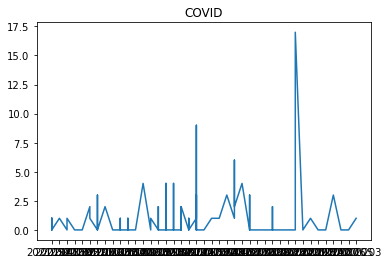

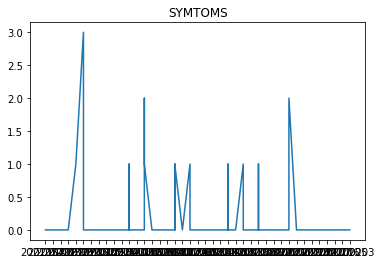

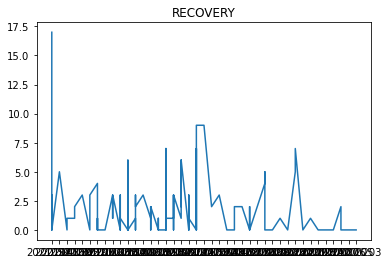

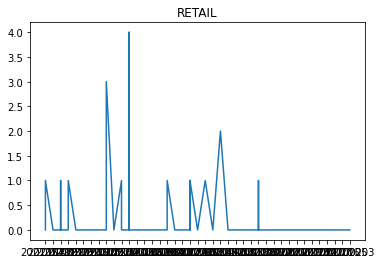

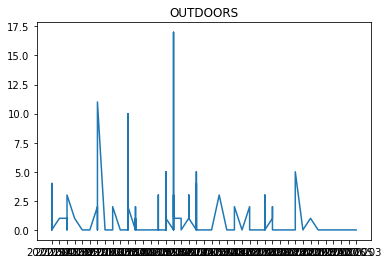

In [88]:
import matplotlib.pyplot as plt
x = dates
ys = get_counts_from_dict(cat_data_count)
count = 0
for y in ys:
    plt.plot(x, y)
    plt.title(categ_data_lyrics[count])
    plt.show()
    count += 1
    
# plt.xlabel("Pandemic Duration Dates")
# plt.ylabel("Key Words Count")
# plt.title("Pandemic Key Words Count Per Time")
# plt.show()